<a href="https://colab.research.google.com/github/fabrytp8/AG1/blob/main/ej/Test_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle
from pprint import pprint
from skimage.feature import hog

from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# predicción individual

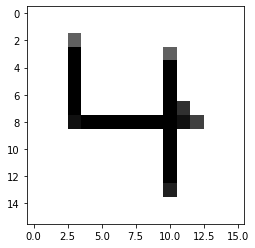

In [ ]:
# Cargar todos los objetos obtenidos en el entrenamiento
# estandarizador
with open('objetos/estandarizador.pickle', 'rb') as fr:
    std = pickle.load(fr)
    
# selector
with open('objetos/selector.pickle', 'rb') as fr:
    sel = pickle.load(fr)

# model
with open('objetos/clasificador.pickle', 'rb') as fr:
    model = pickle.load(fr)

test_img = cv2.imread('test_5_1.png',0)
plt.imshow(test_img,cmap='gray')
plt.show()

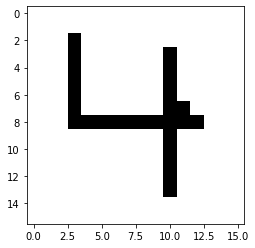

In [ ]:
t, test_ima = cv2.threshold(test_img,0,1,cv2.THRESH_OTSU)
# test_ima = cv2.resize(test_ima,(16,16))
plt.imshow(test_ima,cmap='gray')
plt.show()

In [ ]:
feat_test = hog(test_ima,orientations=9, pixels_per_cell=(4,4), cells_per_block=(2,2),
                  transform_sqrt = True, block_norm='L1')

feat_test = std.transform(np.expand_dims(feat_test,axis=0))
print(np.shape(feat_test))

feat_test = sel.transform(feat_test)
print(np.shape(feat_test))

y_pred = model.predict(feat_test)
print('prediction: ' + str(y_pred[0]))

(1, 324)
(1, 144)
prediction: 4
